In [ ]:
!pip -q install fastbook
!pip -q install kagglehub

In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *

In [ ]:
def get_dls(bs, size,path):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=size, min_scale=0.75)])
    return dblock.dataloaders(path, bs=bs)

In [ ]:
dls_train = get_dls(32,224,"dataset_reorganizado/treino")
dls_teste = get_dls(32,224,"dataset_reorganizado/teste")

In [ ]:
learn = vision_learner(dls_train, "convnext_base", loss_func=LabelSmoothingCrossEntropy(),
metrics=accuracy, cbs=MixUp).to_fp16()

model.safetensors:   0%|          | 0.00/354M [00:00<?, ?B/s]

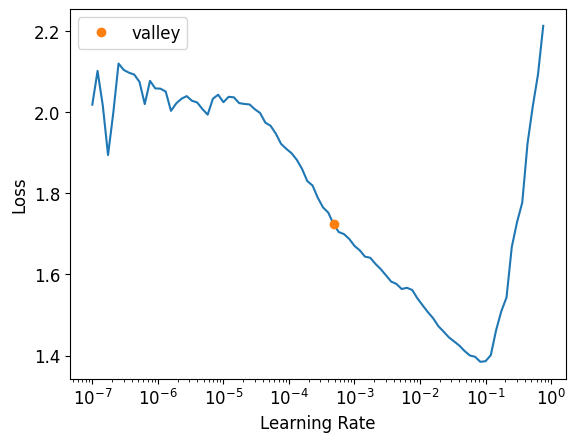

In [ ]:
lr = learn.lr_find()

In [ ]:
import torch
import gc

gc.collect()  # Força o Garbage Collector a rodar e liberar tensores não referenciados
torch.cuda.empty_cache()  # Libera a memória cache da GPU

In [ ]:
learn.fit_one_cycle(3,lr.valley)

epoch,train_loss,valid_loss,accuracy,time
0,0.804654,0.400577,0.975417,01:00
1,0.661708,0.351039,0.986250,00:59
2,0.637392,0.338674,0.992500,01:00


In [ ]:
import torch
import gc

gc.collect()  # Força o Garbage Collector a rodar e liberar tensores não referenciados
torch.cuda.empty_cache()  # Libera a memória cache da GPU

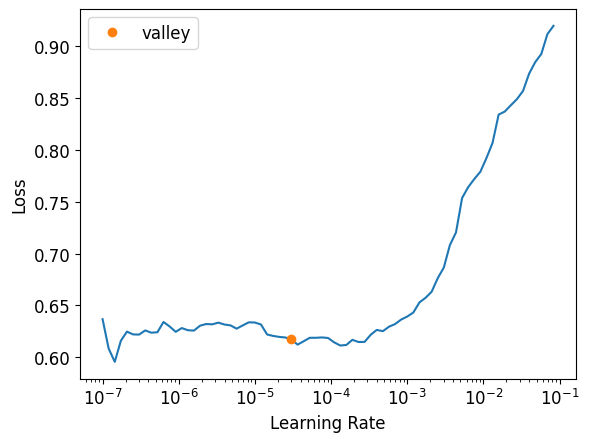

In [ ]:
learn.unfreeze()
lr_final = learn.lr_find()

In [ ]:
learn.fit_one_cycle(2,lr_final.valley)

epoch,train_loss,valid_loss,accuracy,time
0,0.588703,0.354397,0.988333,00:21
1,0.575204,0.336058,1.000000,00:21


In [ ]:
learn.dls = dls_teste

In [ ]:
preds,targs = learn.tta()
accuracy(preds, targs).item()

0.9983333349227905

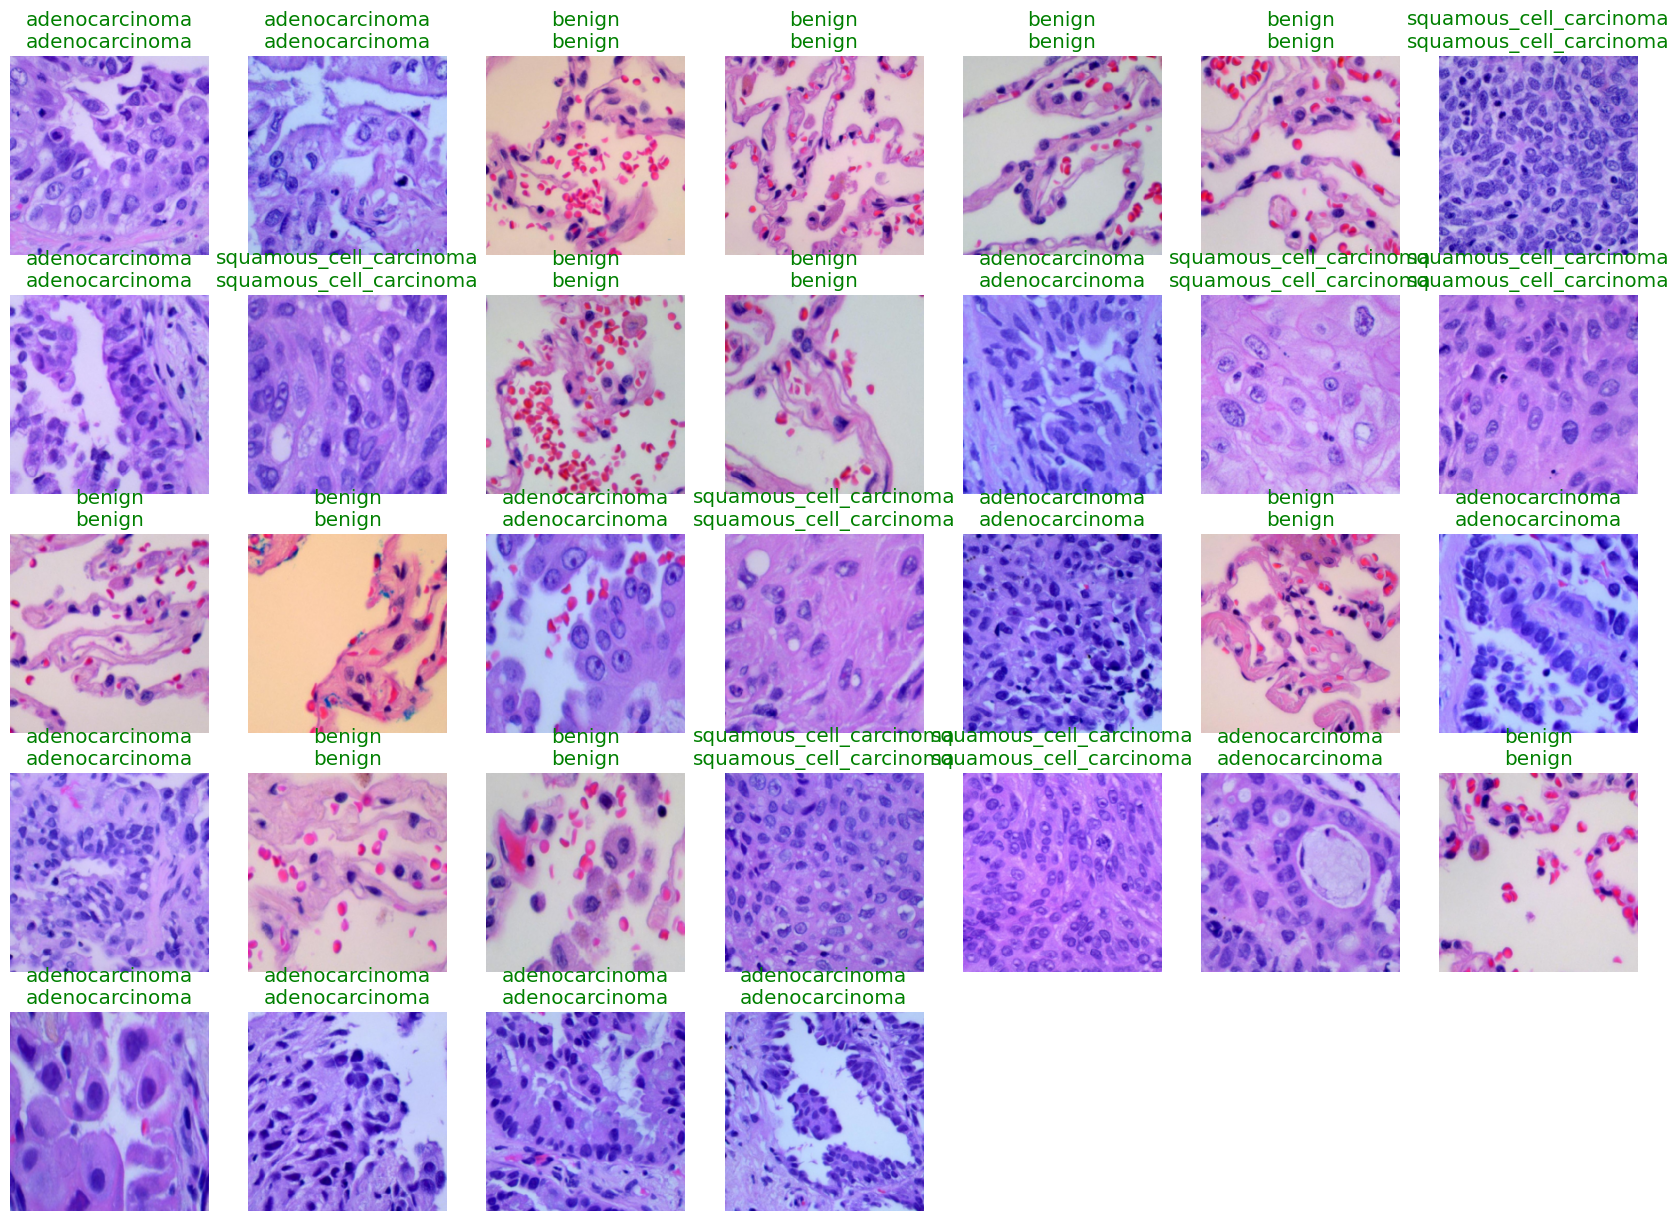

In [ ]:
learn.show_results(max_n=100)

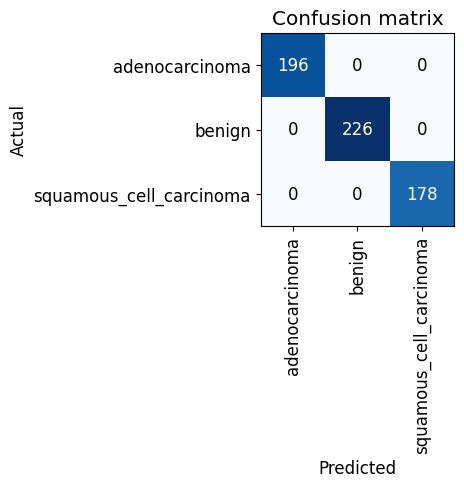

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.predict("/notebooks/benig.jpg")

('adenocarcinoma', tensor(0), tensor([0.6199, 0.2708, 0.1093]))